# Regressione

Consideriamo i dati di tabella. Formuliamo degli appropriati modelli di regressione.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, probplot

x_bar: 5.98
y_bar: 13.6
Sig2_x: 12.88
Sig_xy: 38.77
b0: -4.39
b1: 3.01


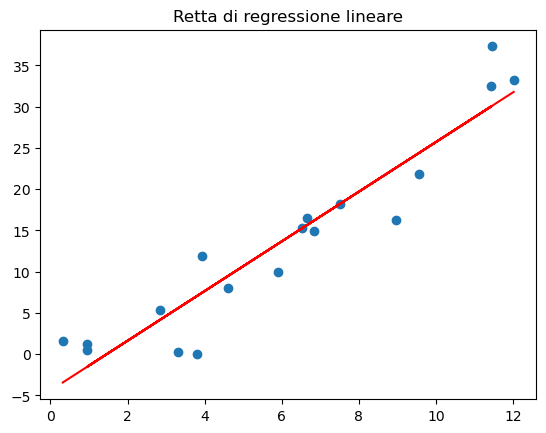

In [2]:
data = np.loadtxt("DATA_reg_lin_2.dat")

x = data[:,0]
y = data[:,1]

n = x.size

x_bar = np.mean(x)
print(f'x_bar: {round(x_bar, 2)}')

y_bar = np.mean(y)
print(f'y_bar: {round(y_bar, 2)}')

sig_x = np.sqrt(np.sum((x-x_bar)**2)/n)
print(f'Sig2_x: {sig_x**2:.2f}')

sig_xy = sum((x-x_bar)*(y-y_bar))/n
print(f'Sig_xy: {sig_xy:.2f}')

b0 = y_bar - sig_xy/(sig_x**2) * x_bar
print(f'b0: {b0:.2f}')

b1 = sig_xy/(sig_x**2)
print(f'b1: {b1:.2f}')

Y = b0 + b1*x
plt.scatter(x, y)
plt.plot(x, Y, 'red')
plt.title("Retta di regressione lineare")
plt.show()

In [3]:
k = 2 # numero di variabili indipendenti

x1 = np.ones(n) # x1, x2, ..., xk sono le variabili indipendenti (predittori)
x2 = x

X = np.zeros((n, k))
X[:, 0] = x1
X[:, 1] = x2
print(f'Matrice:\n {X}\n')

XX = np.linalg.pinv(X)
print(f'Matrice pseudo inversa:\n {XX}\n')

b = np.dot(XX, y) 
print(f'Stimatori b: {b}\n')

y_hat = np.dot(X, b) #prodotto matriciale
print(f'y_hat: \n{y_hat}\n')

Matrice:
 [[ 1.    0.32]
 [ 1.    2.83]
 [ 1.    3.94]
 [ 1.    6.52]
 [ 1.    7.51]
 [ 1.   11.43]
 [ 1.    0.96]
 [ 1.    3.32]
 [ 1.    4.62]
 [ 1.    6.65]
 [ 1.    8.96]
 [ 1.   11.45]
 [ 1.    0.96]
 [ 1.    3.8 ]
 [ 1.    5.91]
 [ 1.    6.83]
 [ 1.    9.56]
 [ 1.   12.02]]

Matrice pseudo inversa:
 [[ 0.20142797  0.1367072   0.10808567  0.04155994  0.01603263 -0.08504522
   0.18492546  0.12407247  0.09055176  0.03820787 -0.02135586 -0.08556093
   0.18492546  0.11169559  0.05728889  0.03356654 -0.03682696 -0.10025847]
 [-0.02440472 -0.01357682 -0.00878838  0.00234149  0.00661226  0.02352276
  -0.02164382 -0.011463   -0.00585493  0.0029023   0.01286742  0.02360904
  -0.02164382 -0.00939233 -0.00028999  0.0036788   0.01545576  0.02606797]]

Stimatori b: [-4.39133048  3.01016775]

y_hat: 
[-3.42807679  4.12744427  7.46873047 15.23496327 18.21502935 30.01488694
 -1.50156943  5.60242646  9.51564454 15.62628508 22.57977259 30.0750903
 -1.50156943  7.04730699 13.39876095 16.16811528 24.

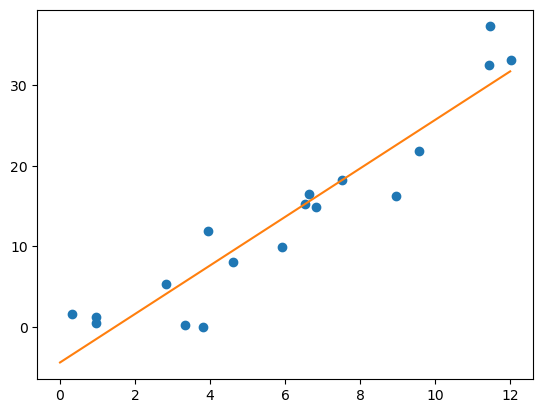

In [4]:
xx = np.linspace(0, 12, 100) # i dati x vanno da 0 a 12
yy = b[0] + b[1]*xx 

plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

In [5]:
R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
print(f'Coefficiente di determinazione: {R2:.2f}')

bound = 0.20
if 1-R2 >= bound:
    print("Questo non è un buon modello")
else:
    print("Questo è un buon modello")

Coefficiente di determinazione: 0.89
Questo è un buon modello


In [6]:
# Test di indipendenza 
# H0 : b1 = 0
# H1 : b1 != 0

M = np.linalg.inv(np.dot(X.T, X)) # prodotto della trasposta di X per X
m = M[1][1]
r = y-y_hat
s2 = np.sum(r**2.)/(n-k)
s = np.sqrt(s2)
T1 = b[1]/(s*np.sqrt(m))
print(f'T1: {T1:.2f}')

alpha = 0.05
k = 2
T = t.ppf(1-alpha/2, n-k)
print(f'T: {T:.2f}')

cond = T1 >= T
print("Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%" if cond else "Non ho abbastanza elementi per rigettare l'ipotesi nulla")

T1: 11.41
T: 2.12
Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%


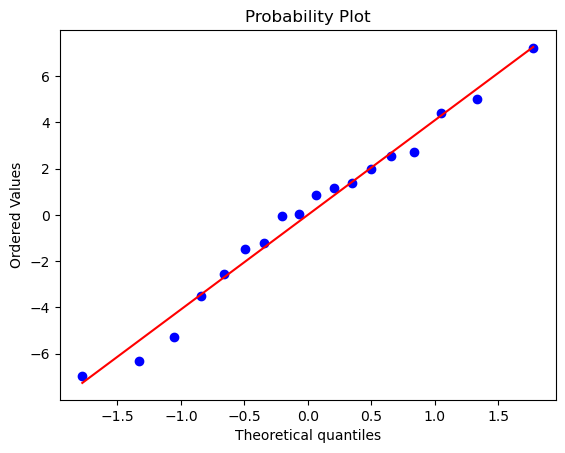

In [7]:
fig, ax = plt.subplots(1, 1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [14]:
# Adottiamo un modello quadratico
k = 3
X2 = np.zeros((n,k))
X2[:,0] = x1
X2[:,1] = x2
X2[:,2] = x2**2.

print(f'Matrice:\n {X2}\n')

XX2 = np.linalg.pinv(X2)
print(f'Matrice pseudo inversa:\n {XX}\n')

b2 = np.dot(XX2, y) 
print(f'Stimatori b: {b2}\n')

y_hat2 = np.dot(X2, b2) #prodotto matriciale
print(f'y_hat: \n{y_hat2}\n')

Matrice:
 [[1.000000e+00 3.200000e-01 1.024000e-01]
 [1.000000e+00 2.830000e+00 8.008900e+00]
 [1.000000e+00 3.940000e+00 1.552360e+01]
 [1.000000e+00 6.520000e+00 4.251040e+01]
 [1.000000e+00 7.510000e+00 5.640010e+01]
 [1.000000e+00 1.143000e+01 1.306449e+02]
 [1.000000e+00 9.600000e-01 9.216000e-01]
 [1.000000e+00 3.320000e+00 1.102240e+01]
 [1.000000e+00 4.620000e+00 2.134440e+01]
 [1.000000e+00 6.650000e+00 4.422250e+01]
 [1.000000e+00 8.960000e+00 8.028160e+01]
 [1.000000e+00 1.145000e+01 1.311025e+02]
 [1.000000e+00 9.600000e-01 9.216000e-01]
 [1.000000e+00 3.800000e+00 1.444000e+01]
 [1.000000e+00 5.910000e+00 3.492810e+01]
 [1.000000e+00 6.830000e+00 4.664890e+01]
 [1.000000e+00 9.560000e+00 9.139360e+01]
 [1.000000e+00 1.202000e+01 1.444804e+02]]

Matrice pseudo inversa:
 [[ 0.20142797  0.1367072   0.10808567  0.04155994  0.01603263 -0.08504522
   0.18492546  0.12407247  0.09055176  0.03820787 -0.02135586 -0.08556093
   0.18492546  0.11169559  0.05728889  0.03356654 -0.036826

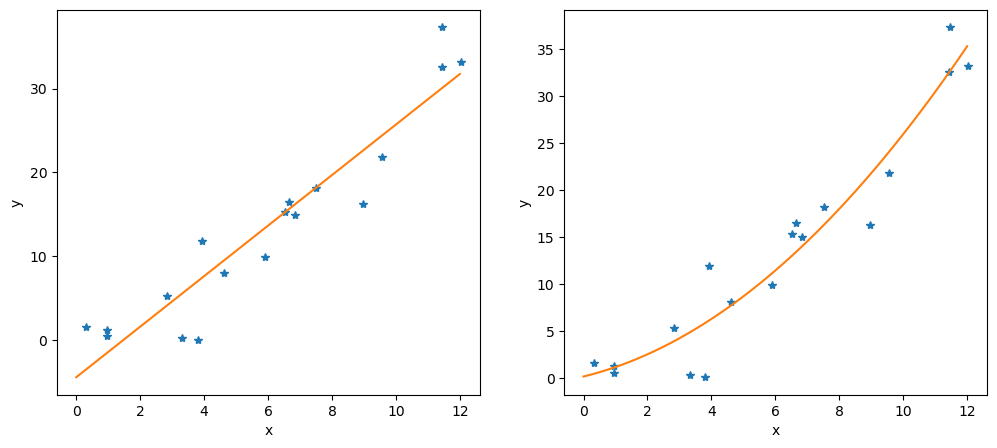

In [19]:
# Grafico
xx = np.linspace(0, 12, 100)
yy = b[0] + b[1]*xx
yy2 = b2[0] + b2[1]*xx + b2[2]*xx**2.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x, y, '*')
ax1.plot(xx, yy)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x, y, '*')
ax2.plot(xx, yy2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [27]:
M2 = np.linalg.inv(np.dot(X2.T,X2))
m2 = M2[1][1]
m3 = M2[2][2]
r2 = y-y_hat_2
s2_2 = np.sum(r2**2.)/(n-3)
s_2 = np.sqrt(s2_2)

# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

T1_2 = b2[1]/(s_2*np.sqrt(m2))
print(f'T1_2: {T1_2:.2f}')

# test di indipendenza 
# H0 : b2 = 0
# H1 : b2 <> 0

T2_2 = b2[2]/(s_2*np.sqrt(m3))
print(f'T2_2: {T2_2:.2f}')

T = t.ppf(1-alpha/2, n-k)
print(f'T: {T:.2f}')

cond = T2_2 >= T
print("Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%" if cond else "Non ho abbastanza elementi per rigettare l'ipotesi nulla")

# Poiché T2_2 > T si rigetta l'ipotesi nulla
# evidenziando una notevole dipendenza dal termine quadratico

T1_2: 1.00
T2_2: 2.73
T: 2.13
Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%


In [31]:
R2 = np.sum((y_hat2-y_bar)**2)/np.sum((y-y_bar)**2)
print(f'Coefficiente di determinazione: {R2:.2f}')

bound = 0.20
if 1-R2 >= bound:
    print("Questo non è un buon modello")
else:
    print("Questo è un buon modello")

# Osserviamo che il coefficiente di determinazione è maggiore rispetto
# a quello del modello lineare suggerendo una migliore adeguatezza
# del modello quadratico

Coefficiente di determinazione: 0.93
Questo è un buon modello
